In [7]:
from active_contour_model import *

In [ ]:
if __name__ == "__main__":
    video_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\Video2D_object_collsion.mp4"
    output_path = r"Output_video_active_contour.mp4"
    check_collision_active_contour_video(video_path, output_path)

    def process_single_image(image_path):
        frame = cv2.imread(image_path)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret, binary = cv2.threshold(gray, 147, 255, cv2.THRESH_BINARY)
        contours, hierachy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
        # Loại bỏ các contour có diện tích lớn hơn ngưỡng
        max_area = 0.5 * frame.shape[0] * frame.shape[1]
        filtered_contours = [contour for contour in contours if cv2.contourArea(contour) < max_area]
    
        # Tạo ảnh kết quả
        result_img = frame.copy()
        for contour in filtered_contours:  # Chỉ vẽ contour đã lọc
            cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 10)

        plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        plt.title("Image with Contours")
        plt.axis("off")
        plt.show()

    #image_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\image4.png"
    image_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\image1.png"
    process_single_image(image_path)


In [3]:
from snake import *

In [ ]:
def process_single_image(image_path):
    frame = cv2.imread(image_path)
    processed_frame = preprocess_frame_for_acm(frame)

    initial_snakes = initialize_snake_contours(processed_frame, num_objects=2)
    updated_snakes = process_frame_with_acm(frame, initial_snakes)

    result_img = frame.copy()
    for snake in updated_snakes:
        snake = snake.astype(np.int32)
        cv2.polylines(result_img, [snake], isClosed=True, color=(0, 255, 0), thickness=2)

    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title("Image with Active Contour")
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    video_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\Video2D_object_collsion.mp4"
    output_path = r"Output_video_active_contour.mp4"
    check_collision_active_contour_video(video_path, output_path)

    image_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\image1.png"
    process_single_image(image_path)

In [ ]:
video_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\Video2D_object_collsion.mp4"
output_path = r"Output_video_active_contour.mp4"
check_collision_active_contour_video(video_path, output_path)

image_path = r"D:\Study\object-collision\Active_Contour_Snake\Item\image1.png"
process_single_image(image_path)

***Normal***

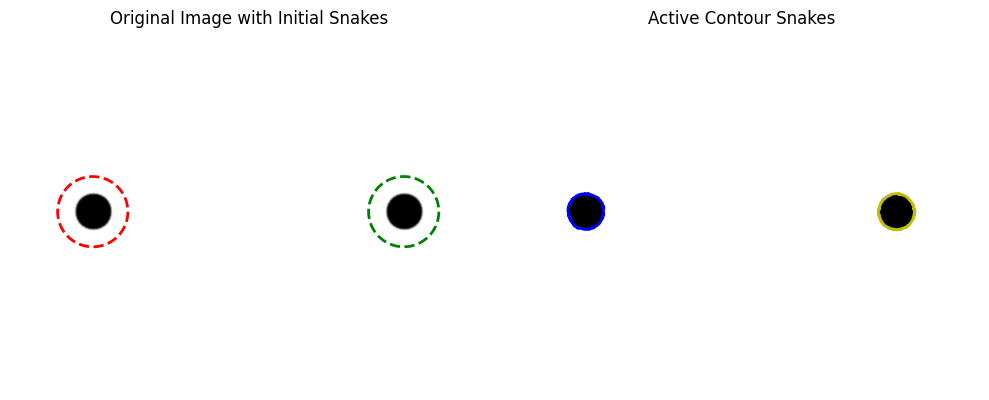

In [44]:
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
from skimage.filters import gaussian
import cv2
import numpy as np

image = cv2.imread(r"D:\Study\object-collision\Active_Contour_Snake\Item\image4.png", cv2.IMREAD_GRAYSCALE)

image = gaussian(image, sigma=2)

h, w = image.shape
s = np.linspace(0, 2 * np.pi, 400)
#Bóng 1
r1, c1 = 510, 235
radius1 = 100
init_snake1 = np.array([r1 + radius1 * np.sin(s), c1 + radius1 * np.cos(s)]).T
#Bóng 2
r2, c2 = 510, 1120
radius2 = 100
init_snake2 = np.array([r2 + radius2 * np.sin(s), c2 + radius2 * np.cos(s)]).T


snake1 = active_contour(
    image,
    init_snake1,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)

snake2 = active_contour(
    image,
    init_snake2,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.flatten()


ax[0].imshow(image, cmap="gray")
ax[0].plot(init_snake1[:, 1], init_snake1[:, 0], '--r', lw=2)
ax[0].plot(init_snake2[:, 1], init_snake2[:, 0], '--g', lw=2)
ax[0].set_title("Original Image with Initial Snakes")
ax[0].set_axis_off()

ax[1].imshow(image, cmap="gray")
ax[1].plot(snake1[:, 1], snake1[:, 0], '-b', lw=2)
ax[1].plot(snake2[:, 1], snake2[:, 0], '-y', lw=2)
ax[1].set_title("Active Contour Snakes")
ax[1].set_axis_off()

fig.tight_layout()
plt.show()

***Radius1 bao luôn Radius2***

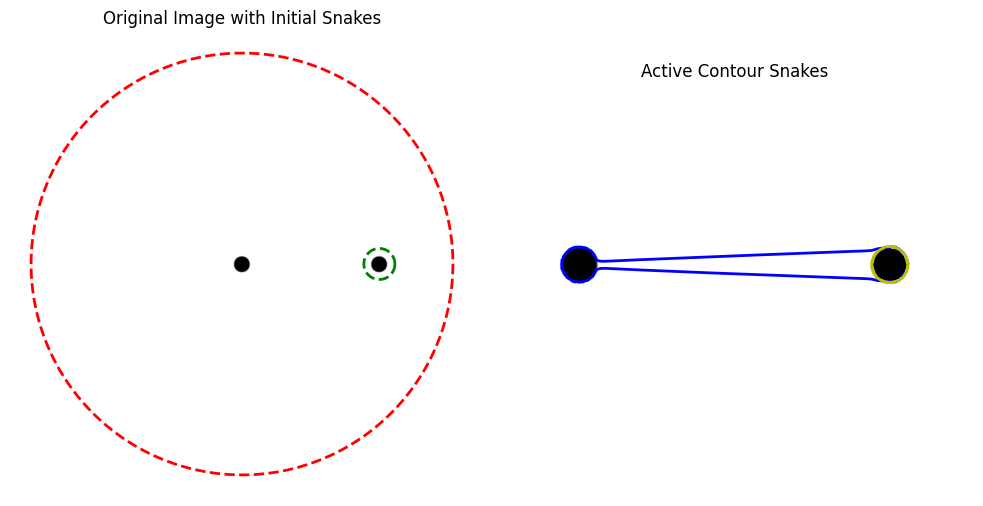

In [42]:
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
from skimage.filters import gaussian
import cv2
import numpy as np

image = cv2.imread(r"D:\Study\object-collision\Active_Contour_Snake\Item\image4.png", cv2.IMREAD_GRAYSCALE)

image = gaussian(image, sigma=2)

h, w = image.shape
s = np.linspace(0, 2 * np.pi, 400)
#Bóng 1
r1, c1 = 510, 235
#radius1 = 100
radius1 = max(h,w)
init_snake1 = np.array([r1 + radius1 * np.sin(s), c1 + radius1 * np.cos(s)]).T
#Bóng 2
r2, c2 = 510, 1120
radius2 = 100
init_snake2 = np.array([r2 + radius2 * np.sin(s), c2 + radius2 * np.cos(s)]).T


snake1 = active_contour(
    image,
    init_snake1,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)

snake2 = active_contour(
    image,
    init_snake2,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.flatten()


ax[0].imshow(image, cmap="gray")
ax[0].plot(init_snake1[:, 1], init_snake1[:, 0], '--r', lw=2)
ax[0].plot(init_snake2[:, 1], init_snake2[:, 0], '--g', lw=2)
ax[0].set_title("Original Image with Initial Snakes")
ax[0].set_axis_off()

ax[1].imshow(image, cmap="gray")
ax[1].plot(snake1[:, 1], snake1[:, 0], '-b', lw=2)
ax[1].plot(snake2[:, 1], snake2[:, 0], '-y', lw=2)
ax[1].set_title("Active Contour Snakes")
ax[1].set_axis_off()

fig.tight_layout()
plt.show()

***Tâm 1 ở mid nhưng radius1 bao toàn bộ frame***

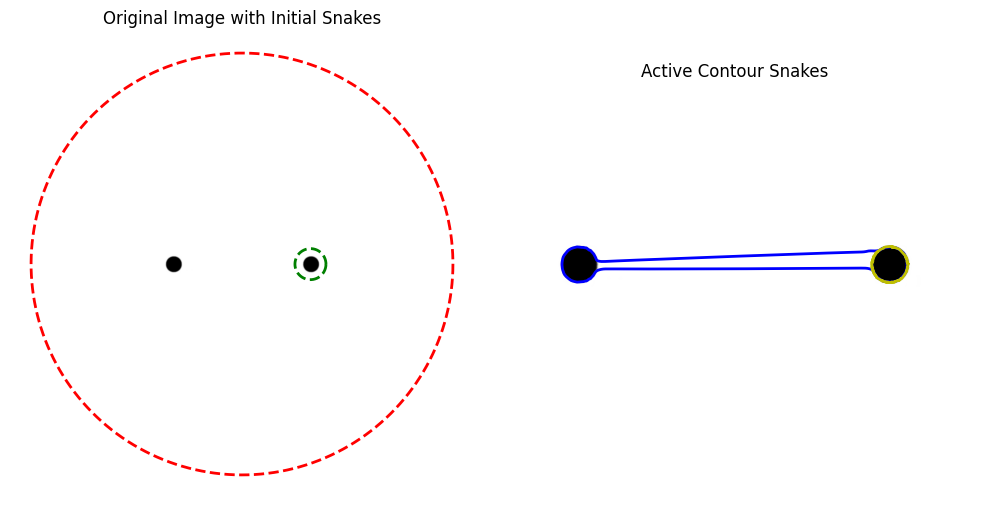

In [43]:
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
from skimage.filters import gaussian
import cv2
import numpy as np

image = cv2.imread(r"D:\Study\object-collision\Active_Contour_Snake\Item\image4.png", cv2.IMREAD_GRAYSCALE)

image = gaussian(image, sigma=2)

h, w = image.shape
s = np.linspace(0, 2 * np.pi, 400)
#Bóng 1
#r1, c1 = 510, 235
#radius1 = 100
r1, c1 = h //2, w //2
radius1 = max(h,w)
init_snake1 = np.array([r1 + radius1 * np.sin(s), c1 + radius1 * np.cos(s)]).T
#Bóng 2
r2, c2 = 510, 1120
radius2 = 100
init_snake2 = np.array([r2 + radius2 * np.sin(s), c2 + radius2 * np.cos(s)]).T


snake1 = active_contour(
    image,
    init_snake1,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)

snake2 = active_contour(
    image,
    init_snake2,
    alpha=0.015,
    beta=0.1,
    gamma=0.001,
    w_line=0,
    w_edge=1,
    max_px_move=1.0,
    max_num_iter=2500,
    convergence=0.1,
    boundary_condition='periodic'
)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.flatten()


ax[0].imshow(image, cmap="gray")
ax[0].plot(init_snake1[:, 1], init_snake1[:, 0], '--r', lw=2)
ax[0].plot(init_snake2[:, 1], init_snake2[:, 0], '--g', lw=2)
ax[0].set_title("Original Image with Initial Snakes")
ax[0].set_axis_off()

ax[1].imshow(image, cmap="gray")
ax[1].plot(snake1[:, 1], snake1[:, 0], '-b', lw=2)
ax[1].plot(snake2[:, 1], snake2[:, 0], '-y', lw=2)
ax[1].set_title("Active Contour Snakes")
ax[1].set_axis_off()

fig.tight_layout()
plt.show()

***Đây***